### PRACTICE SIMPLE LINEAR REGRESSION

In [29]:
### import important library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
df = pd.read_csv('height-weight.csv')

In [31]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

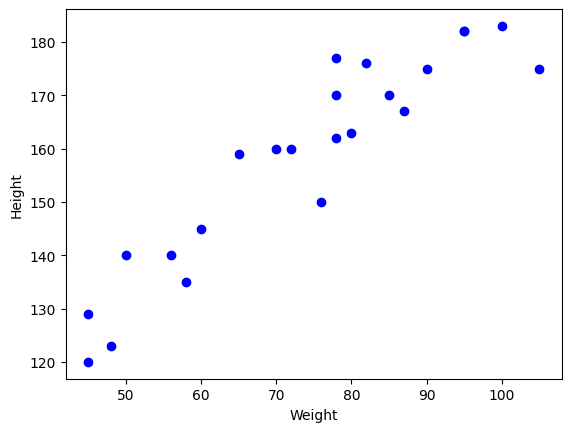

In [32]:
### scatter plot

plt.scatter(x=df['Weight'], y=df['Height'], color='blue', marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')

In [33]:
### finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


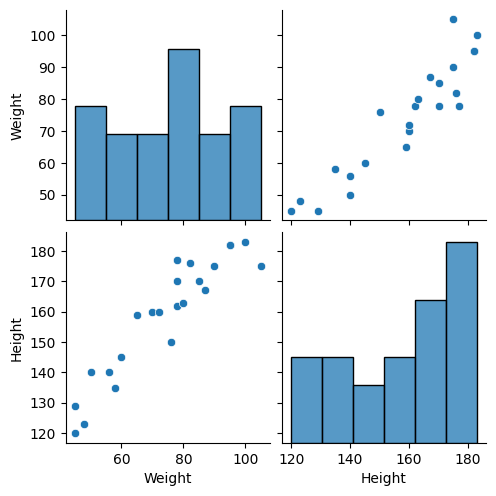

In [34]:
### seaborn for visulization

import seaborn as sns

sns.pairplot(data=df)

### divide into dependent and independent features

In [35]:
### 1. independent feature :- must be either  dataFrame or 2D Array

X = df[['Weight']]  ## dataframe
print(type(X))
np.array(X).shape  ### 23 rows and 1 column (2D)

<class 'pandas.core.frame.DataFrame'>


(23, 1)

In [36]:
### 2. dependent feature :- must be either 1D Array or Series

Y = df['Height']  ## this is series
print(type(Y))
np.array(Y).shape ### only 23 entries, and 1 dimension

<class 'pandas.core.series.Series'>


(23,)

## Separate the Dataset into train and test

In [37]:
from  sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### now Standardize the data

### 🔹 Standardization क्या होता है?

Standardization एक तकनीक है जिससे हम डेटा के सभी फीचर्स को एक common scale पर लाते हैं, जैसे:<br>

कोई भी फीचर का mean = 0 और standard deviation = 1 कर देना।

उदाहरण: अगर कोई फीचर 1 से 1000 तक है और दूसरा 0 से 1 तक, तो मॉडल ज़्यादा असर उस बड़े स्केल वाले फीचर का लेगा। इसलिए हम सबको एक ही स्केल पर लाते हैं।

### ✅ क्यों करते हैं Standardization?

1. Feature scale को बराबर करने के लिए
जिससे सभी variables (जैसे height, weight) बराबरी से model में contribute करें।

2. Gradient Descent-based मॉडल (जैसे Linear Regression, Logistic Regression, SVM आदि) को बेहतर काम करने के लिए।

3. Distance-based मॉडल्स (जैसे KNN, K-Means) में सही distance निकालने के लिए।

## 🔧 1. fit() क्या करता है?
यह आपके training data से pattern सीखता है

उदाहरण के लिए:

* StandardScaler में — mean और standard deviation निकालता है

* LabelEncoder में — हर label को एक unique number assign करता है

* OneHotEncoder में — कौन-कौन से categories हैं, ये सीखता है

**Note :** *📌 सिर्फ सीखने का काम करता है, data को बदलता नहीं है*

## 🔄 2. transform() क्या करता है?
* यह उस सीखी हुई जानकारी (जैसे mean/std या labels) का use करके data को बदलता ह
यानी स्केल करता है, encode करता है, आदि

## ⚙️ Combined use: fit_transform()
* जब आप एक ही साथ fit() और transform() करना चाहते हैं

* आमतौर पर सिर्फ training data के लिए use करते हैं

## ✅ Summary Table:
<pre>
Method	             क्या करता है	                          कब इस्तेमाल करें
--------------------------------------------------------------------------------
1. fit()	     Data से सीखता है (जैसे mean, std आदि)      सिर्फ training data पर
2. transform()       सीखी हुई चीज़ों से data को बदलता ह           train और test दोनों पर
3. fit_transform()   दोनों एक साथ करता है	                      training data पर (shortcut)
</pre>

In [38]:
### Standardization

from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()  ### created an instance

X_train = scaler.fit_transform(X_train)  ## fit:-learn pattern of X_train data, and then transforn the X_train (i.e.,make : mean = 0 and std = 1)

In [40]:
X_test = scaler.transform(X_test)  ## Apply the same transformation on the X_test data using the same pattern learned from X_train

In [41]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [42]:
### check mean and Standard deviation

print(X_test.mean())  ## mean of the test data
print(X_test.std())  ## standard deviation of the test data

0.3147783487965052
1.1797121288008448


In [43]:
## Apply Simple Linear Regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)  ### created an instance

regression.fit(X_train, Y_train)  ### fit the model : model ko data se train karna(sikhna)

## optional 👇
## fitted_reg = regression.fit(X_train, Y_train)  ### fit the model : model ko data se train karna(sikhna)

LinearRegression(n_jobs=-1)

## 🎯 क्यों इस्तेमाल करते हैं .fit() यहाँ?

### 🔧 1. Model को Data से सीखने के लिए
* X_train: Independent variable (जैसे weight)
* Y_train: Dependent variable (जैसे height)
<br>
* जब आप .fit(X_train, Y_train) चलाते हैं, तब:

Model best possible line (in linear regression) सीखता है:
<pre>   y=m⋅x+b
        जहां:
        m = slope (coefficient)
        b = intercept
</pre>

### 🤖 Model Parameters सीखे जाते हैं:
* यह training data के आधार पर coefficient (slope) और intercept (cut-off) calculate करता है।

#### 📦 अंदर क्या होता है fit() में?
For Linear Regression:
<pre>
* self.coef_       # slope(s) for each feature
* self.intercept_  # y-intercept
</pre>
* Model finds best fit line using Least Squares Method:
    * [ Minimize ∑(Y actual− Y predicted)<sup>2</sup> ]
 
### ✅ क्यों ज़रूरी है?
<pre>
काम वजह
-----------------------------------------------------------
1. fit()	   मॉडल को data से सीखने के लिए
2. बिना fit()	model कोई भी prediction नहीं कर सकता
</pre>

### ⚠️ अगर आप fit() नहीं चलाते:

* regression.predict(X_test)
Error आएगा: 
NotFittedError: This LinearRegression instance is not fitted yet

### 🔁 फिर क्या करें?
1. Use fit() → सीखो (train करो)
2. Use predict() → भविष्यवाणी करो (test करो)

In [44]:
### after fitting the model, we access 

# 1. slope or coefficient
print("Coefficient or Slpoe: ",regression.coef_)
# 2. intercept
print("Intercept: ",regression.intercept_)

Coefficient or Slpoe:  [17.2982057]
Intercept:  156.47058823529412


Text(0, 0.5, 'Height')

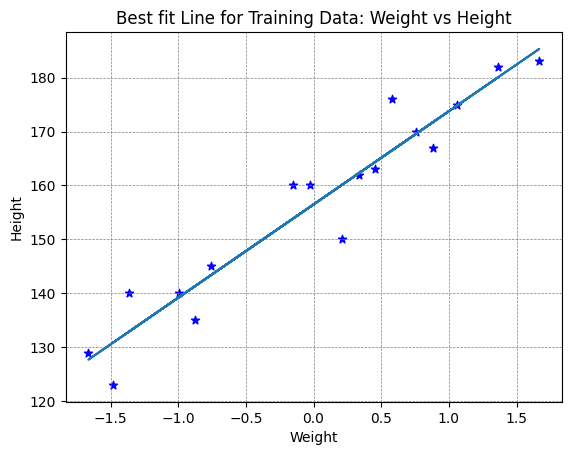

In [45]:
## plot training data and find best fit line

plt.scatter(X_train, Y_train, color='blue', marker='*')

## best fit line
plt.plot(X_train, regression.predict(X_train)) 

plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.title('Best fit Line for Training Data: Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')

In [46]:
X_train  ## Dataframe (2D)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [47]:
Y_train, ### series (1D)

(1     135
 13    183
 5     162
 2     123
 11    182
 20    129
 3     145
 4     160
 18    150
 16    140
 21    140
 22    160
 7     175
 10    176
 14    170
 19    167
 6     163
 Name: Height, dtype: int64,)

In [48]:
print(regression.coef_)
print(regression.intercept_)

[17.2982057]
156.47058823529412


### Prediction for test Data
1. predicted Height Output = Intercept + coef_(Weight)
2. Y_pred = 156.4705 + 17.298*(X_test)

In [49]:
### prediction for the test data
Y_pred = regression.predict(X_test)

### ""Y_pred"" kitna accurate hai, iski performance check kne ke liye, We use ""Performance mertics""

In [50]:
Y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

## 🔍 क्या होता है "Performance Metrics"?
Performance Metrics वे तरीके होते हैं जिनसे हम यह मापते हैं कि हमारा machine learning model कितना अच्छा काम कर रहा है।
मतलब:<br>
"Model ने जो prediction किया है, वो सही है या नहीं — और कितनी सही है?"

### 🔢 अलग-अलग मॉडल के लिए अलग-अलग Metrics
#### 📘 1. Regression Model (जैसे height को predict करना)
<pre>
Metric	                             मतलब
-----------------------------------------------------------------------------------
1. MAE (Mean Absolute Error)	     Actual और Predicted के बीच का औसत फर्क
2. MSE (Mean Squared Error)	     Error का square लेकर उसका average
3. RMSE (Root Mean Squared Error)    MSE का square root — ज़्यादा readable
4. R² Score (R-squared)	             Model ने data को कितनी अच्छी तरह explain किया (1 = perfect)
</pre>

#### 📗 2. Classification Model (जैसे email spam है या नहीं)
<pre>
Metric	                       मतलब
-----------------------------------------------------------------------------------
Accuracy	               कितने prediction सही निकले (Total सही / Total)
Precision	               Positive prediction में से कितने सच में सही थे
Recall                         जितने सही Positive थे, उसमें से कितने को model ने पकड़ा
F1 Score	               Precision और Recall का balance
</pre>

### 🎯 Summary Table:
<pre>
Model Type	          Common Metrics	                   Purpose
-----------------------------------------------------------------------------------
1. Regression	        MAE, MSE, RMSE, R²	           Continuous output check
2. Classification	Accuracy, Precision, Recall, F1	   Categorical output check
</pre>

In [51]:
### preformance metrices

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
mse = mean_squared_error(Y_test, Y_pred) 
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  114.84069295228699
Mean Absolute Error:  9.66512588679501
R-squared:  0.7360826717981276
Root Mean Squared Error:  10.716374991212605


#### Note: Conclusion
## 🔍 What Each Metric Means:

### 1. ✅ MAE (Mean Absolute Error) = 9.67
- On average, the model's predictions are off by ~9.67 cm from the actual height.
- **Lower is better.**
- It gives a real-world scale of error **without squaring** the differences.

---

### 2. ✅ MSE (Mean Squared Error) = 114.84
- This is the average of **squared differences** between actual and predicted heights.
- **Squaring penalizes larger errors more** than smaller ones.
- Useful for optimization, but not as interpretable as MAE.

---

### 3. ✅ RMSE (Root Mean Squared Error) = 10.72
- Square root of MSE → gives error in the **original unit** (centimeters).
- **Interpretation:** Average prediction error is ~10.72 cm.
- Good for **comparing models** — sensitive to outliers.

---

### 4. ✅ R-squared (R²) = 0.736
- The model explains **~73.6% of the variation in height**.
- Remaining **26.4% of the variance is unexplained by the model**, i.e., the model is not perfect.
- It's a **decent fit**, especially for a model using only **one input (weight)**.

---

## 🧠 Final Conclusion:

- Your model is **reasonably accurate** — it explains most of the trend in the data.
- On average, predictions are **~10 cm off**, which may be acceptable depending on the use case.
- There is still **room to improve**, especially if:
  - You **add more features** (e.g., age, gender)
  - You **use more complex models** (e.g., polynomial regression, tree-based models)

---

### More Complex Modal to for better trainning:
✅ 1. Add More Relevant Features
Currently, you may only be using Weight to predict Height
Try adding:
* Age
* Gender
* Genetics
* Lifestyle factors
More relevant features can make the model stronger.

✅ 2. Use Polynomial Regression
If the relationship is non-linear, simple linear regression won’t capture it fully.

✅ 3. Remove Outliers

✅ 4. Try Different Models
*Sometimes linear regression is not enough.*
Try other regression algorithms:
* Decision Tree Regressor
* Random Forest Regressor
* Support Vector Regressor (SVR)

✅ 5. Feature Engineering

✅ 6. Cross-Validation


## 🧮 R^2 formula:

* $R^2 = 1 - \frac{SSR}{SST}$
#### Where, 
* R2 represents the requrired R Squared value
* SSR represents the residual sum of squares
$$
SSR = \sum (y_i - \hat{y}_i)^2
$$

* SST represents the total sum of squares.
$$
SST = \sum (y_i - \bar{y})^2
$$

## 🧮 Adjusted R² Formula:
$$
R^2_{\text{adj}} = 1 - \left(1 - R^2\right) \cdot \frac{n - 1}{n - k - 1}
$$
Where:
* 𝑅<sup>2</sup> = regular R-squared
* n = number of observations (rows)
* k = number of independent variables (features)

In [53]:
### adjusted R²
n = len(Y_test)  # number of observations
k = X_test.shape[1]  # number of independent variables
r_squared = r2  # regular R-squared

adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1)/(n - k - 1))
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  0.6701033397476595


In [54]:
### prediction for the new data
new_weight = scaler.transform([[72]])   ###  since my model is trained on standardized (scaled) data, not the original (raw) weight values.
                                        ## so we need to transform the new weight value using the same scaler
predicted_height = regression.predict(new_weight)  # replace 70 with any weight value you want to predict height for

print(predicted_height,"in cm")

[155.97744705] in cm


c:\Users\Asus\Desktop\javaProgramming\PythonProgammingForDataScience\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Predicted Height for New Weight')

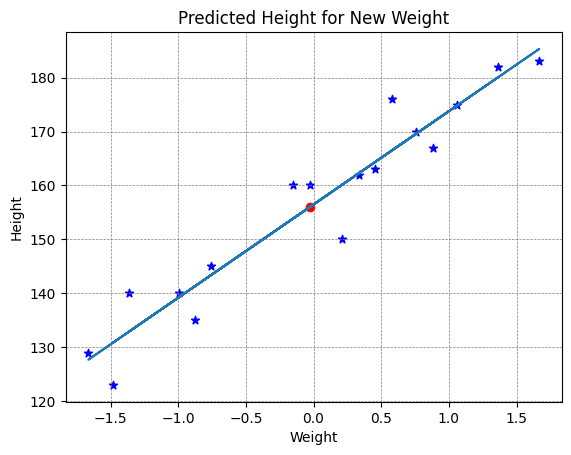

In [55]:
### plot the predicted height for the new weight

plt.scatter(X_train, Y_train, color='blue', marker='*')  ## training data
plt.plot(X_train, regression.predict(X_train))  ## best fit line
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.scatter(new_weight, predicted_height, color='red', marker='o')  ## new data point
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Predicted Height for New Weight')

### OLS Regression [Ordinary Least Squares Regression]:
OLS is a method used to estimate[आकलन] the parameters of a linear regression model.<br>
It minimizes the sum of the squared differences between the observed values and the values predicted by the model.<br>
The goal is to find the best-fitting line through the data points, which can be used for prediction and analysis.

In [56]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'